## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.096116 -0.915160 -1.421455 -1.317103 -0.381497 -0.533314
1 -0.356377  0.856560  0.041981  1.315072  0.469999  1.050801
2  1.479911 -1.510951 -0.053270  1.024250 -0.463349 -0.743271
3 -1.669798 -0.815284  0.415851 -0.014896 -1.594797 -1.747706
4  1.055978  0.619060  1.183499 -1.364972 -0.647088  0.139665


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9834065	total: 67ms	remaining: 1m 6s
1:	learn: 0.9736980	total: 67.6ms	remaining: 33.7s
2:	learn: 0.9640196	total: 68.2ms	remaining: 22.7s
3:	learn: 0.9547915	total: 68.7ms	remaining: 17.1s
4:	learn: 0.9470158	total: 69.2ms	remaining: 13.8s
5:	learn: 0.9373089	total: 69.7ms	remaining: 11.5s
6:	learn: 0.9275895	total: 70.3ms	remaining: 9.97s
7:	learn: 0.9196384	total: 70.9ms	remaining: 8.79s
8:	learn: 0.9116138	total: 71.4ms	remaining: 7.87s
9:	learn: 0.9024487	total: 72ms	remaining: 7.12s
10:	learn: 0.8950048	total: 72.6ms	remaining: 6.52s
11:	learn: 0.8850095	total: 73.2ms	remaining: 6.02s
12:	learn: 0.8748430	total: 73.8ms	remaining: 5.6s
13:	learn: 0.8669287	total: 74.4ms	remaining: 5.24s
14:	learn: 0.8605619	total: 74.8ms	remaining: 4.91s
15:	learn: 0.8523715	total: 75.3ms	remaining: 4.63s
16:	learn: 0.8450390	total: 75.8ms	remaining: 4.38s
17:	learn: 0.8381045	total: 76.4ms	remaining: 4.17s
18:	learn: 0.8319316	total: 76.9ms	remaining: 3.9

87:	learn: 0.4576915	total: 108ms	remaining: 1.12s
88:	learn: 0.4543827	total: 109ms	remaining: 1.11s
89:	learn: 0.4507753	total: 109ms	remaining: 1.1s
90:	learn: 0.4470301	total: 109ms	remaining: 1.09s
91:	learn: 0.4436288	total: 110ms	remaining: 1.08s
92:	learn: 0.4395551	total: 110ms	remaining: 1.07s
93:	learn: 0.4352534	total: 110ms	remaining: 1.06s
94:	learn: 0.4318389	total: 111ms	remaining: 1.05s
95:	learn: 0.4285751	total: 111ms	remaining: 1.05s
96:	learn: 0.4249572	total: 112ms	remaining: 1.04s
97:	learn: 0.4213295	total: 112ms	remaining: 1.03s
98:	learn: 0.4181187	total: 112ms	remaining: 1.02s
99:	learn: 0.4139228	total: 113ms	remaining: 1.01s
100:	learn: 0.4110127	total: 113ms	remaining: 1.01s
101:	learn: 0.4072823	total: 114ms	remaining: 1s
102:	learn: 0.4039777	total: 114ms	remaining: 994ms
103:	learn: 0.4006439	total: 115ms	remaining: 988ms
104:	learn: 0.3978604	total: 115ms	remaining: 981ms
105:	learn: 0.3947372	total: 115ms	remaining: 974ms
106:	learn: 0.3920871	total: 

253:	learn: 0.1342154	total: 187ms	remaining: 550ms
254:	learn: 0.1332071	total: 188ms	remaining: 549ms
255:	learn: 0.1321541	total: 188ms	remaining: 547ms
256:	learn: 0.1313620	total: 189ms	remaining: 545ms
257:	learn: 0.1304284	total: 189ms	remaining: 544ms
258:	learn: 0.1293590	total: 189ms	remaining: 542ms
259:	learn: 0.1283739	total: 190ms	remaining: 540ms
260:	learn: 0.1274758	total: 190ms	remaining: 539ms
261:	learn: 0.1263782	total: 191ms	remaining: 537ms
262:	learn: 0.1252632	total: 191ms	remaining: 536ms
263:	learn: 0.1242092	total: 192ms	remaining: 534ms
264:	learn: 0.1232797	total: 192ms	remaining: 533ms
265:	learn: 0.1223291	total: 192ms	remaining: 531ms
266:	learn: 0.1213569	total: 193ms	remaining: 530ms
267:	learn: 0.1204819	total: 193ms	remaining: 528ms
268:	learn: 0.1194712	total: 194ms	remaining: 527ms
269:	learn: 0.1184536	total: 194ms	remaining: 526ms
270:	learn: 0.1176389	total: 195ms	remaining: 524ms
271:	learn: 0.1166427	total: 195ms	remaining: 523ms
272:	learn: 

470:	learn: 0.0385484	total: 291ms	remaining: 327ms
471:	learn: 0.0383561	total: 292ms	remaining: 326ms
472:	learn: 0.0382031	total: 292ms	remaining: 326ms
473:	learn: 0.0380254	total: 293ms	remaining: 325ms
474:	learn: 0.0378508	total: 293ms	remaining: 324ms
475:	learn: 0.0377015	total: 293ms	remaining: 323ms
476:	learn: 0.0375185	total: 294ms	remaining: 322ms
477:	learn: 0.0373360	total: 294ms	remaining: 321ms
478:	learn: 0.0371908	total: 295ms	remaining: 321ms
479:	learn: 0.0370884	total: 295ms	remaining: 320ms
480:	learn: 0.0369210	total: 296ms	remaining: 319ms
481:	learn: 0.0368208	total: 296ms	remaining: 318ms
482:	learn: 0.0366330	total: 297ms	remaining: 317ms
483:	learn: 0.0365398	total: 297ms	remaining: 317ms
484:	learn: 0.0364002	total: 297ms	remaining: 316ms
485:	learn: 0.0362212	total: 298ms	remaining: 315ms
486:	learn: 0.0361001	total: 298ms	remaining: 314ms
487:	learn: 0.0359637	total: 299ms	remaining: 314ms
488:	learn: 0.0358550	total: 299ms	remaining: 313ms
489:	learn: 

643:	learn: 0.0199692	total: 371ms	remaining: 205ms
644:	learn: 0.0199121	total: 371ms	remaining: 204ms
645:	learn: 0.0198798	total: 372ms	remaining: 204ms
646:	learn: 0.0198169	total: 372ms	remaining: 203ms
647:	learn: 0.0197437	total: 373ms	remaining: 203ms
648:	learn: 0.0196758	total: 373ms	remaining: 202ms
649:	learn: 0.0196091	total: 374ms	remaining: 201ms
650:	learn: 0.0195436	total: 374ms	remaining: 201ms
651:	learn: 0.0194792	total: 375ms	remaining: 200ms
652:	learn: 0.0194159	total: 375ms	remaining: 199ms
653:	learn: 0.0193127	total: 375ms	remaining: 199ms
654:	learn: 0.0192338	total: 376ms	remaining: 198ms
655:	learn: 0.0191724	total: 376ms	remaining: 197ms
656:	learn: 0.0191121	total: 376ms	remaining: 197ms
657:	learn: 0.0190528	total: 377ms	remaining: 196ms
658:	learn: 0.0189945	total: 378ms	remaining: 195ms
659:	learn: 0.0189136	total: 378ms	remaining: 195ms
660:	learn: 0.0188566	total: 379ms	remaining: 194ms
661:	learn: 0.0187777	total: 379ms	remaining: 194ms
662:	learn: 

861:	learn: 0.0117040	total: 475ms	remaining: 76ms
862:	learn: 0.0116783	total: 475ms	remaining: 75.4ms
863:	learn: 0.0116374	total: 476ms	remaining: 74.9ms
864:	learn: 0.0116100	total: 476ms	remaining: 74.3ms
865:	learn: 0.0115632	total: 477ms	remaining: 73.8ms
866:	learn: 0.0115362	total: 477ms	remaining: 73.2ms
867:	learn: 0.0115230	total: 478ms	remaining: 72.7ms
868:	learn: 0.0114963	total: 478ms	remaining: 72.1ms
869:	learn: 0.0114798	total: 479ms	remaining: 71.5ms
870:	learn: 0.0114668	total: 479ms	remaining: 71ms
871:	learn: 0.0114568	total: 480ms	remaining: 70.4ms
872:	learn: 0.0114440	total: 480ms	remaining: 69.8ms
873:	learn: 0.0114343	total: 480ms	remaining: 69.2ms
874:	learn: 0.0114221	total: 481ms	remaining: 68.7ms
875:	learn: 0.0114061	total: 481ms	remaining: 68.1ms
876:	learn: 0.0113752	total: 482ms	remaining: 67.5ms
877:	learn: 0.0113447	total: 482ms	remaining: 67ms
878:	learn: 0.0113120	total: 483ms	remaining: 66.4ms
879:	learn: 0.0112621	total: 483ms	remaining: 65.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

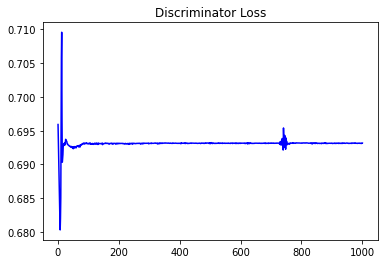

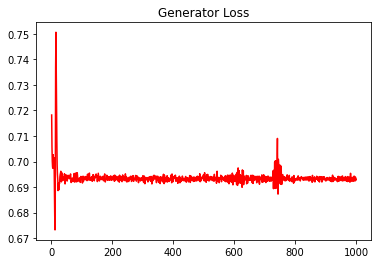

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08405175658247628


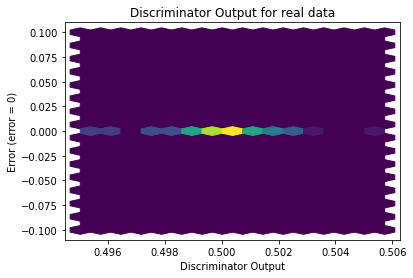

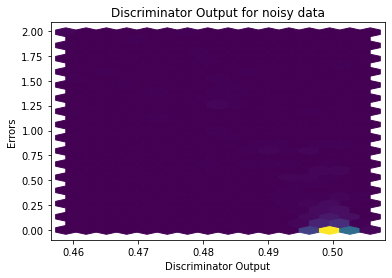

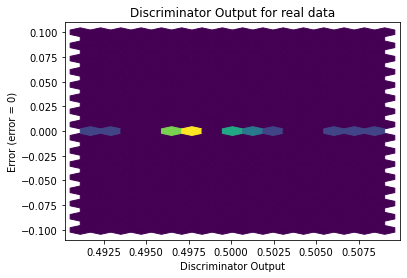

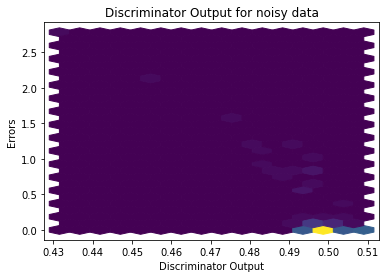

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


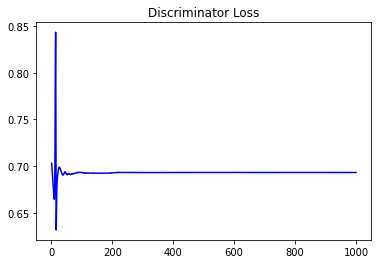

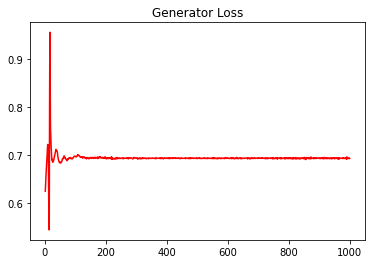

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12525246555069192


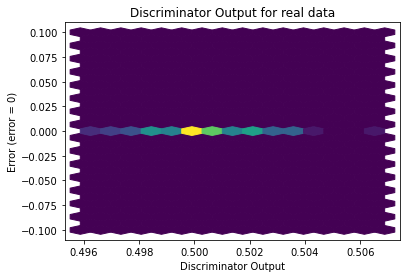

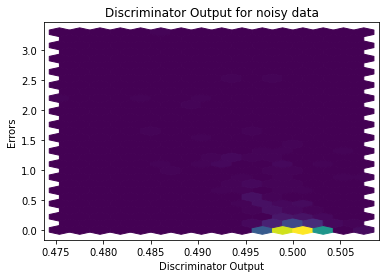

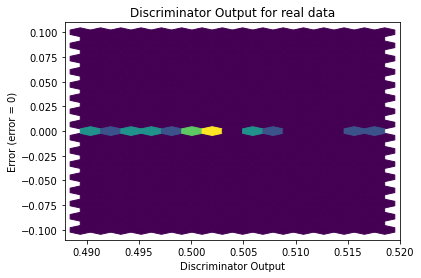

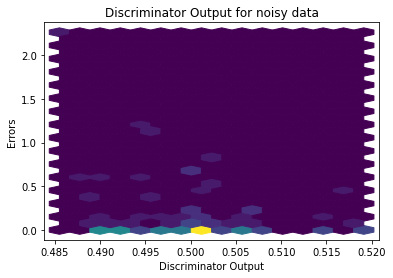

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1951]], requires_grad=True)
